In [166]:
import pandas as pd

df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

# Separate the features and the target variable
X = df.drop('stroke', axis=1)  
y = df['stroke']


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From the previous observation, we can see that BMI is the only column with missing values. These missing values could be replaced with the mean value, but it might be better to remove them altogether since they represent a small number of instances. 

In [168]:
X['bmi'] = X['bmi'].fillna(X['bmi'].mean())

The dataset includes both categorical and continuous variables. The categorical variables are 'gender', 'work_type', 'smoking_status', 'Residence_type', and 'ever_married', while the continuous variables are 'id', 'age', 'bmi' and 'avg_glucose_level'. 

The distribution of values for the categorical variables will be shown next:

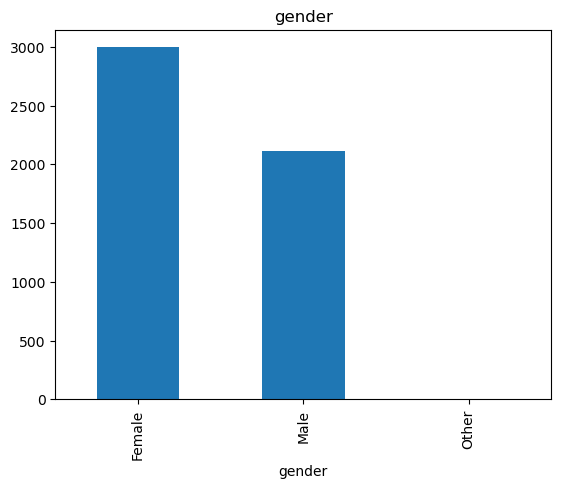

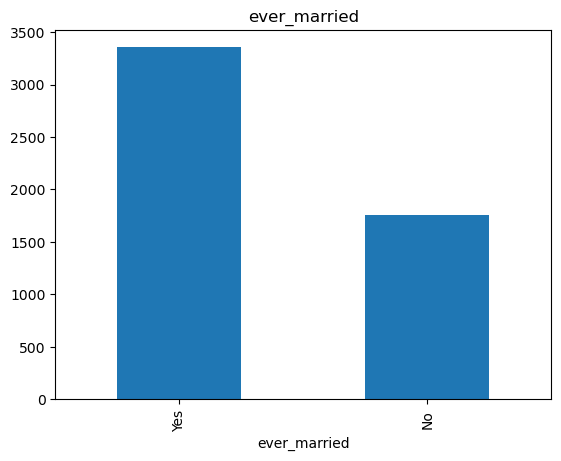

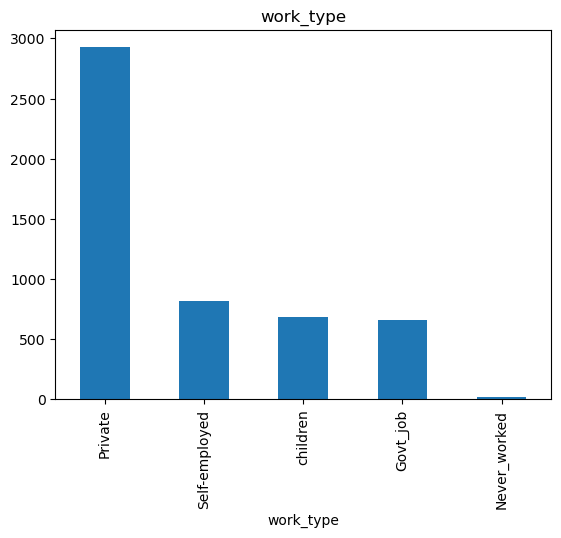

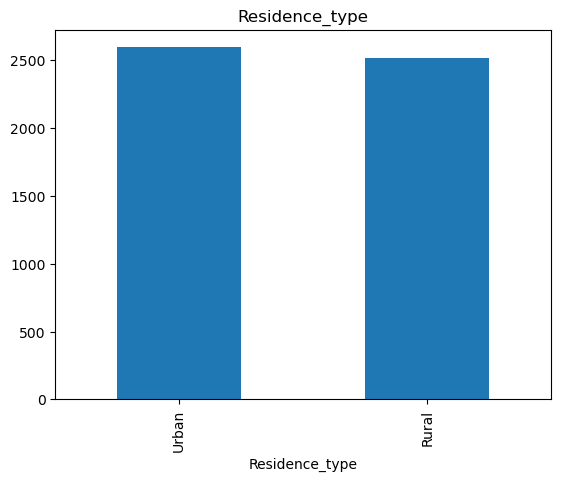

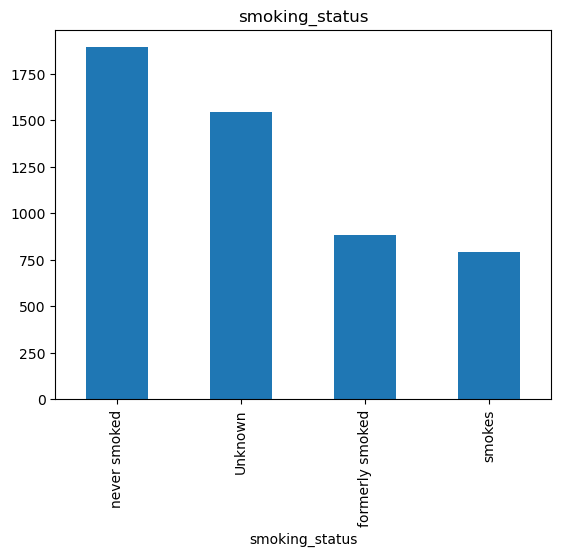

In [169]:
from matplotlib import pyplot as plt

for col in X.select_dtypes(include=['object', 'category']).columns:
    X[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()


Based on the previous observation, it might be worth considering removing rows that contain values which occur very infrequently, such as 'other' in the 'gender' column and 'never_worked' in the 'work_type' column.

Categorical features will be encoded using label encoding for subsequent analysis. Additionally, considering the manageable number of categorical values, one-hot encoding could also be applied.

In [170]:
from sklearn.preprocessing import LabelEncoder

def encode(X):
    encoder = LabelEncoder()
    for column in X.columns:
        if X[column].dtype == 'object':
            X[column] = encoder.fit_transform(X[column])
    return X
            
X = encode(X)


Checking statistics:

In [171]:
X.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000


From the previous table, we notice that the range of values in the 'bmi' column is outside the normal bounds. Such values can be removed. The same might apply to the 'avg_glucose_level' column.

In [172]:
y.describe()

count    5110.000000
mean        0.048728
std         0.215320
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stroke, dtype: float64

Over 75% of the rows for the target variable have a value of 0. It is important to ensure that rows where the target variable has a value of 1 are included in the training set. Oversampling could be a good solution as well.

The same observation applies to the columns 'heart_disease' and 'hypertension'.

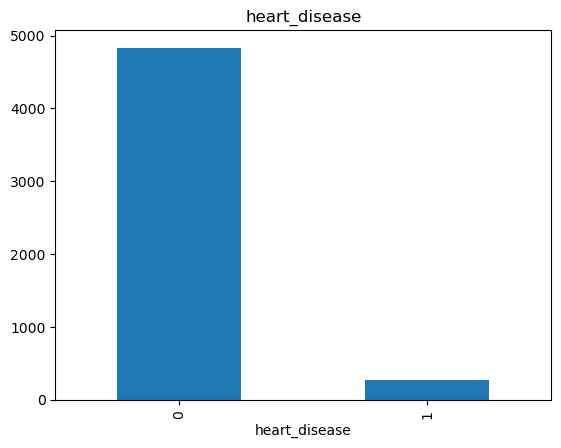

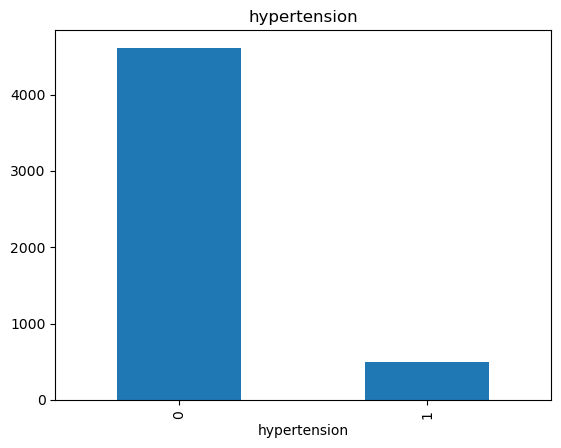

In [173]:
for col in ['heart_disease', 'hypertension']:
    X[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

Checking for multicollinearity:

Correlation Matrix:
                         id    gender       age  hypertension  heart_disease  \
id                 1.000000  0.002511  0.003538      0.003550      -0.001296   
gender             0.002511  1.000000 -0.028202      0.020994       0.085447   
age                0.003538 -0.028202  1.000000      0.276398       0.263796   
hypertension       0.003550  0.020994  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.085447  0.263796      0.108306       1.000000   
ever_married       0.013690 -0.031005  0.679125      0.164243       0.114644   
work_type         -0.015757  0.056422 -0.361642     -0.051761      -0.028023   
Residence_type    -0.001403 -0.006738  0.014180     -0.007913       0.003092   
avg_glucose_level  0.001092  0.055180  0.238171      0.174474       0.161857   
bmi                0.003084 -0.026678  0.333398      0.167811       0.041357   
smoking_status     0.014074 -0.062581  0.265199      0.111038       0.048460   
stroke             0

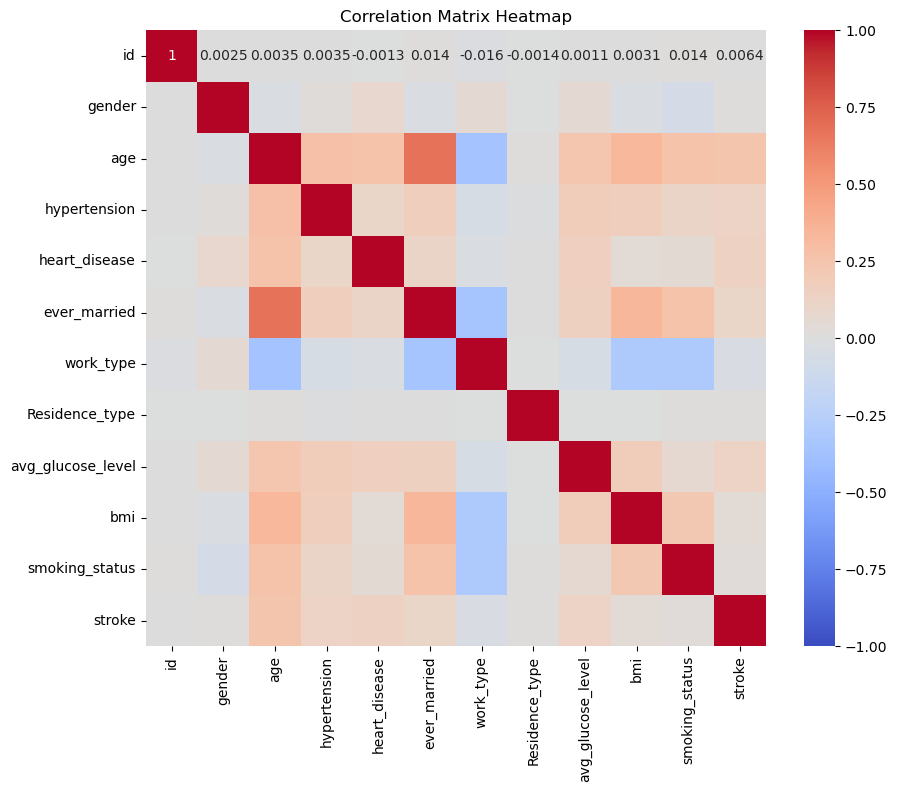

In [174]:
import seaborn as sns

df = encode(df)

correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

The highest absolute correlation between variables is 0.679125, occurring between the columns 'age' and 'ever_married'. Since this correlation does not indicate a particularly strong dependency, and considering that both columns are individually important for the target variable (from a domain perspective), neither column will be removed.


The column 'id' will be removed as it holds no necessary meaning for training purposes.